In [ ]:
# 1) ABBA   -> HIP HIP -> Slow   -> TECH
# 2) ABBA   -> TECH    -> HIPHOP -> SLOW
# 3) HIPHOP -> TECH    -> ABBA   -> SLOW

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

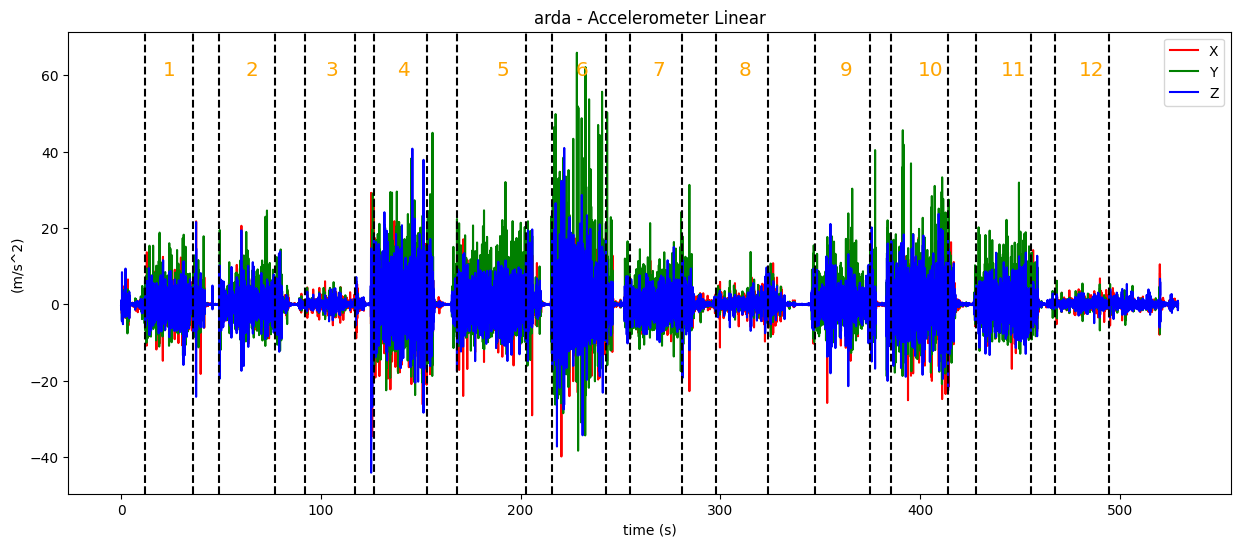

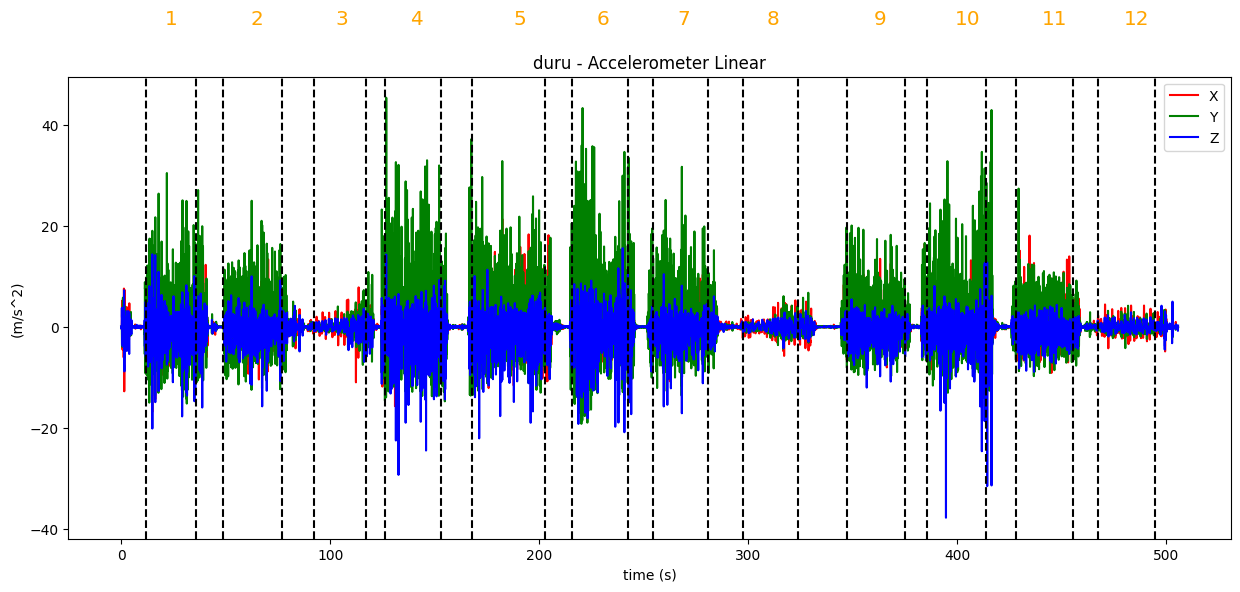

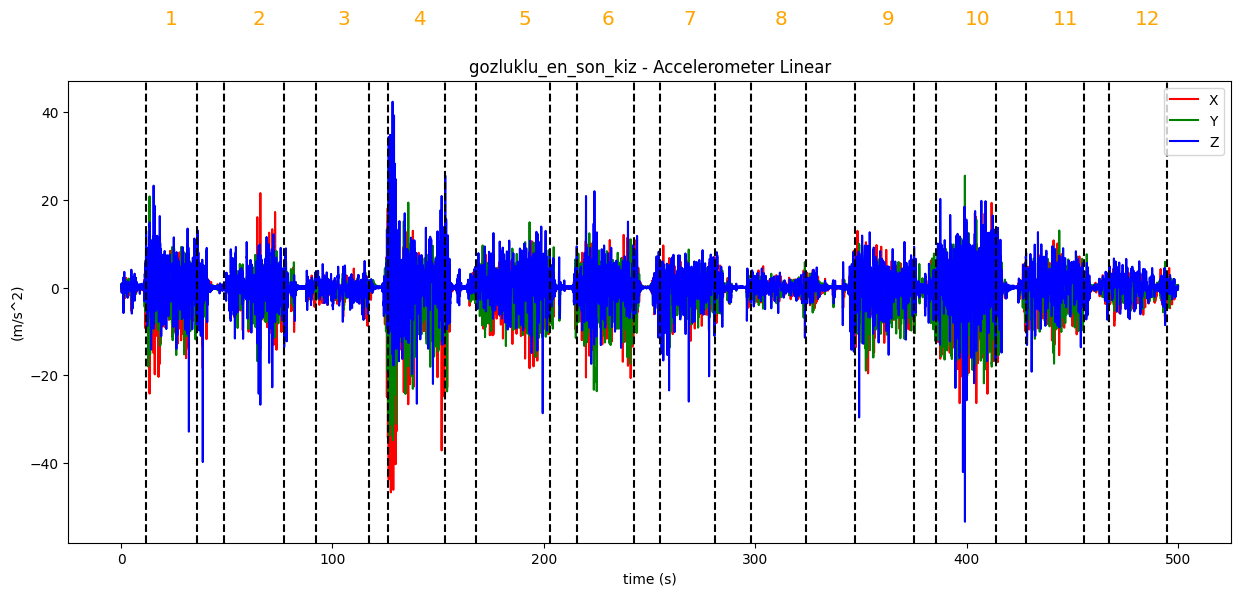

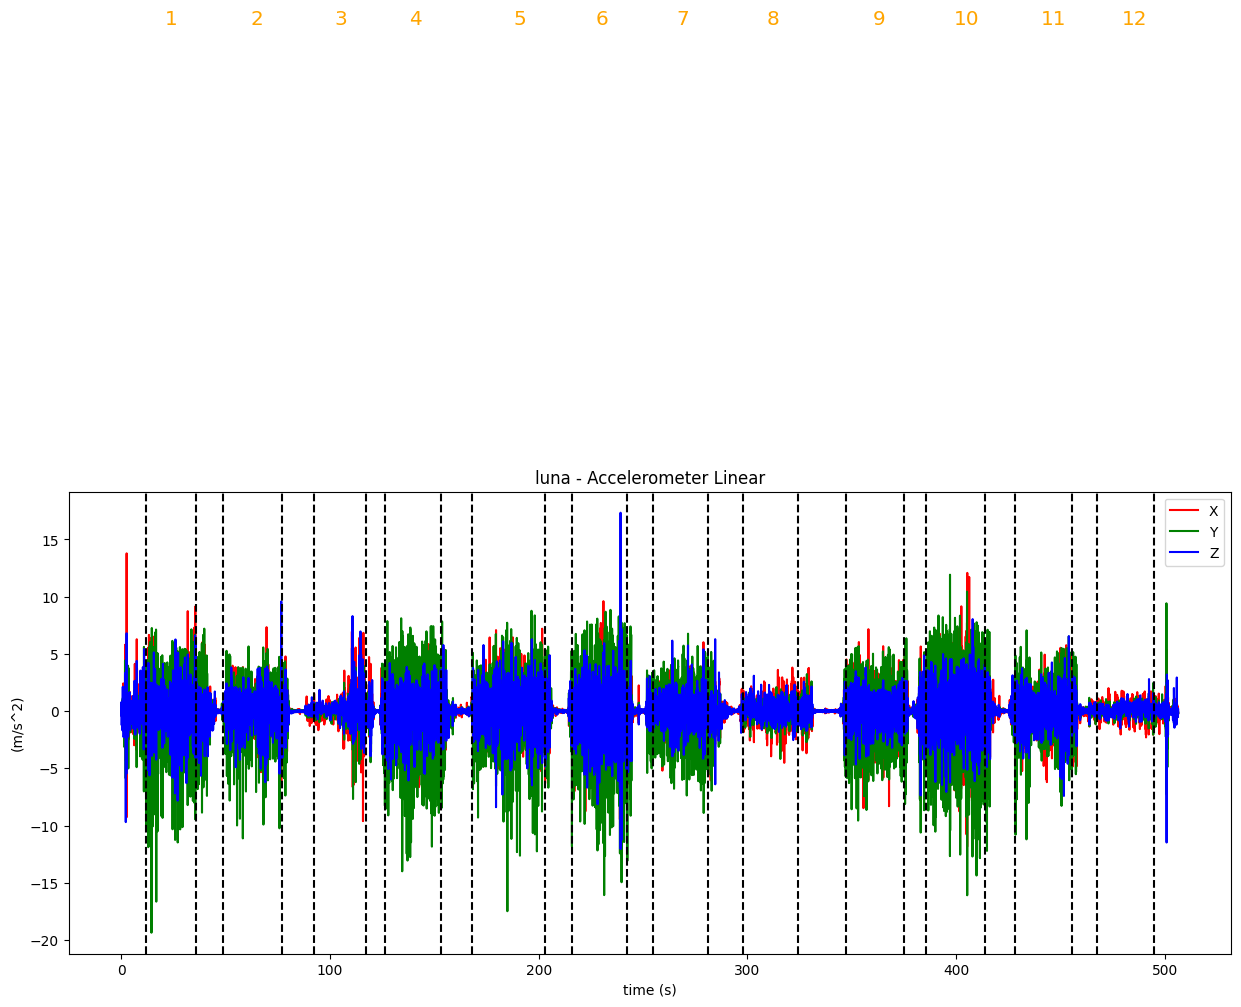

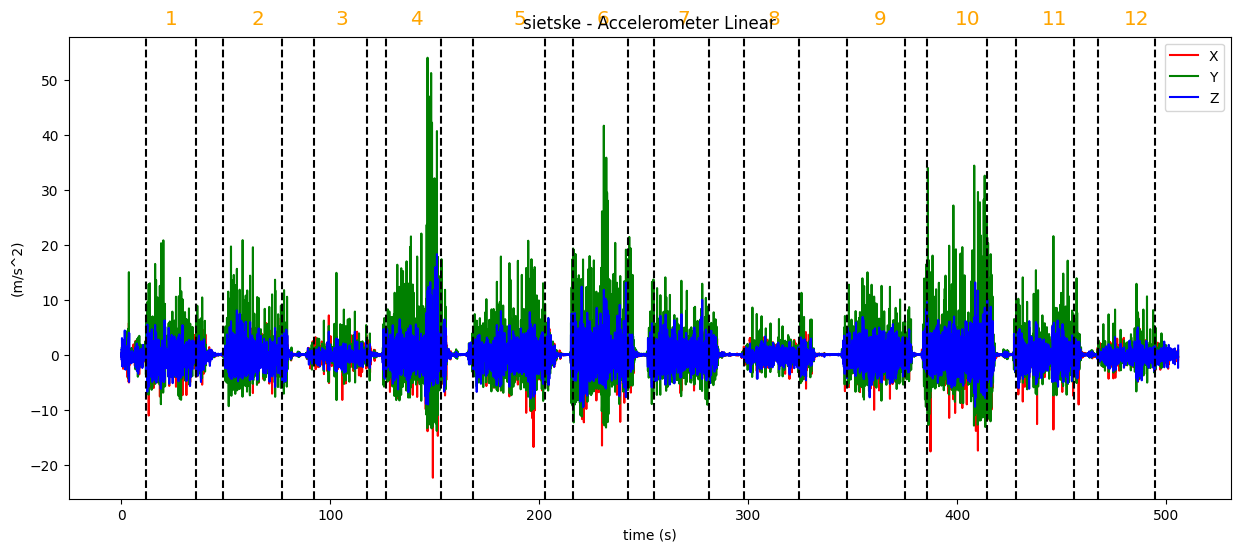

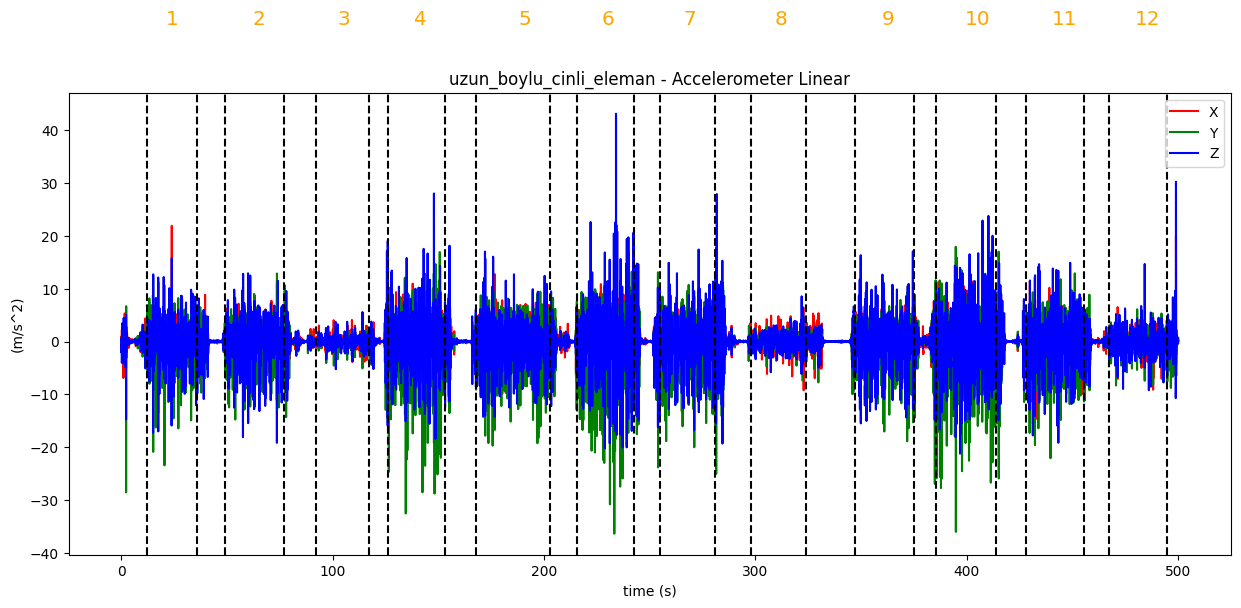

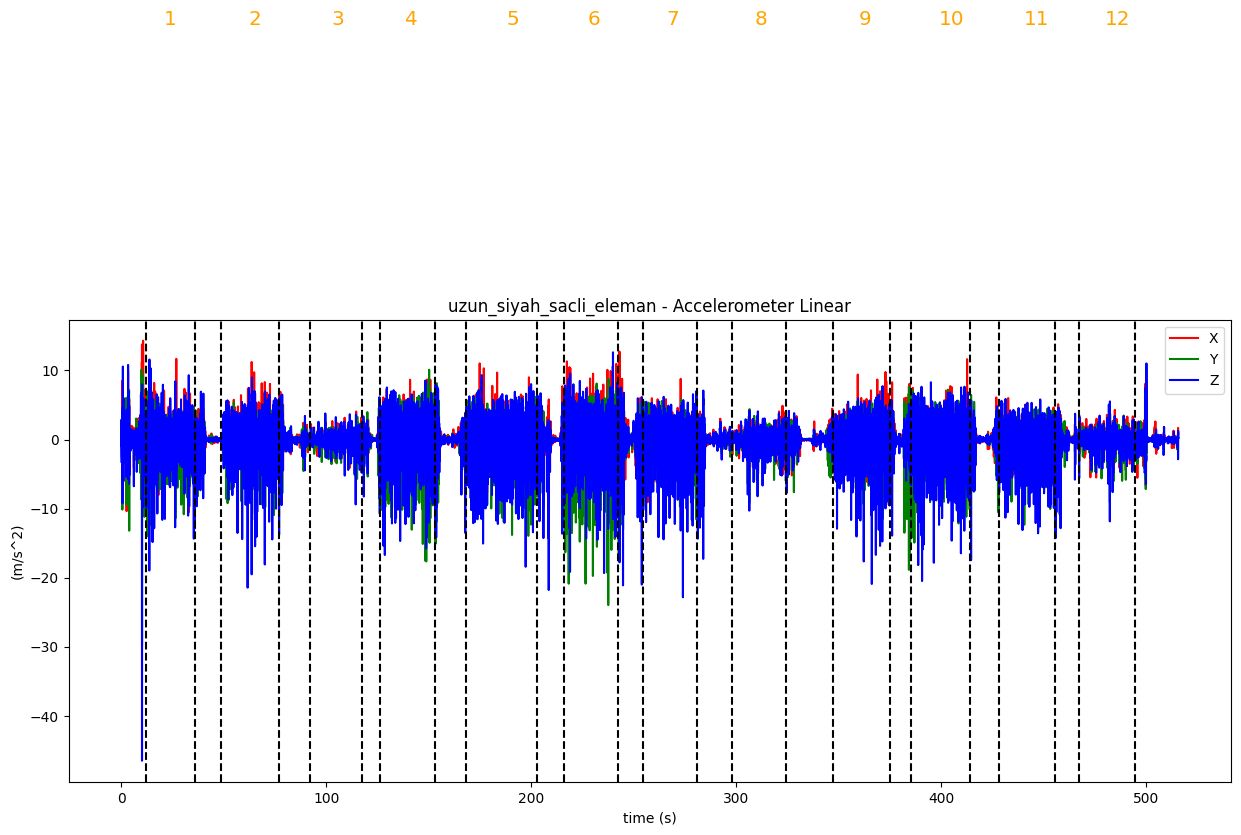

In [116]:
subject_names = ['arda','duru','gozluklu_en_son_kiz','luna','sietske','uzun_boylu_cinli_eleman','uzun_siyah_sacli_eleman']

for subject_id,SUBJECT in enumerate(subject_names):

    t_start = 12

    DATA_PATH = f".\\data\\working_data\\{SUBJECT}\\"
    INTERVALS = [0, 23.88, 36.85, 65.03, 80.17, 105.3, 114.42, 141.12, 156.04, 190.84, 203.86, 230.52, 242.71, 
                268.97, 285.81, 312.12, 335.37, 362.99, 373.56, 401.96, 416.22, 443.57, 455.41, 482.69]

    accelerometer_linear = pd.read_csv(f"{DATA_PATH}Linear Accelerometer.csv")
    gyroscope = pd.read_csv(f"{DATA_PATH}Gyroscope.csv")
    location = pd.read_csv(f"{DATA_PATH}Location.csv")
    magnetometer = pd.read_csv(f"{DATA_PATH}Magnetometer.csv")

    plt.figure(figsize=(15, 6))
    plt.plot(accelerometer_linear['Time (s)'], accelerometer_linear['X (m/s^2)'], color='r', label='X')
    plt.plot(accelerometer_linear['Time (s)'], accelerometer_linear['Y (m/s^2)'], color='g', label='Y')
    plt.plot(accelerometer_linear['Time (s)'], accelerometer_linear['Z (m/s^2)'], color='b', label='Z')
    [plt.axvline(x=_x+t_start, ls='--', lw=1.5, c='black') for _x in INTERVALS]
    [plt.text(_x+t_start-15, 60, f"{_y+1}", fontsize='x-large', color='orange') for _x,_y in zip(INTERVALS[1::2], range(12))]
    plt.title(f"{SUBJECT} - Accelerometer Linear")
    plt.xlabel('time (s)')
    plt.ylabel('(m/s^2)')
    plt.legend(loc='upper right')
    # plt.savefig(f"{SUBJECT}_accelerometer_linear.png", bbox_inches='tight')
    # plt.xlim([10, 100])
    plt.show()

    intervals_list = np.array([_x+t_start for _x in INTERVALS])

    merged_df = accelerometer_linear.merge(gyroscope).merge(magnetometer)
    merged_df['name'] = SUBJECT
    merged_df['id'] = subject_id
    merged_df['label'] = 0

    for idx in np.arange(len(intervals_list)//2):
        start = intervals_list[(idx*2)]
        end = intervals_list[(idx*2)+1]
        merged_df.loc[(merged_df['Time (s)']>=start)&(merged_df['Time (s)']<=end),'label'] = idx + 1

    save_pd = merged_df[merged_df['label']!=0]
    save_pd.to_csv(f"id_{subject_id}.csv")

In [134]:
pd_list = []

for subject_id,SUBJECT in enumerate(subject_names):
    tmp = pd.read_csv(f"id_{subject_id}.csv",index_col=0)
    pd_list.append(tmp)

In [135]:
final_pd = pd.concat(pd_list)
final_pd

,Time (s),X (m/s^2),Y (m/s^2),Z (m/s^2),X (rad/s),Y (rad/s),Z (rad/s),X (µT),Y (µT),Z (µT),name,id,label
796,12.012569,0.258931,0.017263,0.672928,-2.439607,-0.878965,-0.619673,-10.723785,-66.139923,30.020233,arda,0,1
797,12.027645,0.028201,-1.215214,0.697732,-2.547378,-0.708728,-0.647140,-9.534470,-67.187988,26.801422,arda,0,1
798,12.042721,0.551394,-3.467114,0.475736,-2.526115,-0.628574,-0.724171,-9.050598,-67.933258,25.146561,arda,0,1
799,12.057797,1.021958,-4.520315,0.221283,-2.360137,-0.418874,-0.767595,-7.907578,-69.015503,21.563385,arda,0,1
800,12.072873,1.894479,-6.195497,0.044461,-2.042278,-0.238945,-0.795367,-7.298889,-69.457855,20.037476,arda,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32937,494.625906,0.043067,0.351477,-0.006649,0.016542,-0.398316,-0.087654,-3.465305,50.365746,6.448685,uzun_siyah_sacli_eleman,6,12
32938,494.640923,0.127661,0.192405,0.121043,0.071068,-0.650885,-0.016586,-3.714901,50.516914,6.604454,uzun_siyah_sacli_eleman,6,12
32939,494.655939,0.231820,0.124691,0.293192,0.156772,-0.832202,0.004958,-4.096218,50.444199,6.763824,uzun_siyah_sacli_eleman,6,12
32940,494.670956,0.424360,-0.015040,0.580191,0.269975,-0.946084,-0.008308,-4.216789,50.455944,6.889381,uzun_siyah_sacli_eleman,6,12


In [136]:
final_pd.columns = ['time','acc_x','acc_y','acc_z','gy_x','gy_y','gy_z','mag_x','mag_y','mag_z','subject_name','subject_id','label']

In [137]:
final_pd['genre'] = np.where(final_pd['label'].isin([1,5,11]), 'POP',
                             np.where(final_pd['label'].isin([2,7,9]), 'HIPHOP',
                                      np.where(final_pd['label'].isin([3,8,12]), 'SLOW','TECHNO')))

In [144]:
final_pd.to_csv('data_cleaned_raw.csv',index=False)

In [148]:
final_pd

,time,acc_x,acc_y,acc_z,gy_x,gy_y,gy_z,mag_x,mag_y,mag_z,subject_name,subject_id,label,genre
796,12.012569,0.258931,0.017263,0.672928,-2.439607,-0.878965,-0.619673,-10.723785,-66.139923,30.020233,arda,0,1,POP
797,12.027645,0.028201,-1.215214,0.697732,-2.547378,-0.708728,-0.647140,-9.534470,-67.187988,26.801422,arda,0,1,POP
798,12.042721,0.551394,-3.467114,0.475736,-2.526115,-0.628574,-0.724171,-9.050598,-67.933258,25.146561,arda,0,1,POP
799,12.057797,1.021958,-4.520315,0.221283,-2.360137,-0.418874,-0.767595,-7.907578,-69.015503,21.563385,arda,0,1,POP
800,12.072873,1.894479,-6.195497,0.044461,-2.042278,-0.238945,-0.795367,-7.298889,-69.457855,20.037476,arda,0,1,POP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32937,494.625906,0.043067,0.351477,-0.006649,0.016542,-0.398316,-0.087654,-3.465305,50.365746,6.448685,uzun_siyah_sacli_eleman,6,12,SLOW
32938,494.640923,0.127661,0.192405,0.121043,0.071068,-0.650885,-0.016586,-3.714901,50.516914,6.604454,uzun_siyah_sacli_eleman,6,12,SLOW
32939,494.655939,0.231820,0.124691,0.293192,0.156772,-0.832202,0.004958,-4.096218,50.444199,6.763824,uzun_siyah_sacli_eleman,6,12,SLOW
32940,494.670956,0.424360,-0.015040,0.580191,0.269975,-0.946084,-0.008308,-4.216789,50.455944,6.889381,uzun_siyah_sacli_eleman,6,12,SLOW


In [145]:
lookup_pd = final_pd.groupby(['subject_name','subject_id','genre','label'])[['acc_x','acc_y','acc_z','gy_x','gy_y','gy_z','mag_x','mag_y','mag_z']].agg(list).reset_index()

In [147]:
lookup_pd.head(60)

,subject_name,subject_id,genre,label,acc_x,acc_y,acc_z,gy_x,gy_y,gy_z,mag_x,mag_y,mag_z
0,arda,0,HIPHOP,2,"[0.1550976875, 0.1106964169, -0.1184262899, -0...","[-0.09478745878, -0.02994651496, 0.05786813915...","[0.1468563294, 0.133200742, -0.08818010509, -0...","[0.02078247257, 0.0334373638, 0.02961232886, 0...","[0.03960832581, 0.0321312733, 0.0274895858, 0....","[0.001108391909, 0.003334680572, 0.01491022855...","[24.94387817, 25.11204529, 25.0974884, 25.2257...","[-66.13897705, -66.12109375, -66.11419678, -66...","[-10.55325317, -10.51985168, -10.52749634, -10..."
1,arda,0,HIPHOP,7,"[-1.228507902, -1.181295583, 0.006011376232, 0...","[-1.155813856, -1.31549079, -1.856643582, -2.3...","[0.5374988669, 0.3794638306, 0.3299817681, -0....","[-1.23704946, -1.254454374, -1.184641838, -1.0...","[-0.1842778474, -0.3267825544, -0.3332865238, ...","[-0.835336864, -0.8448970914, -0.8307248354, -...","[-9.839538574, -8.464904785, -7.791427612, -6....","[-75.45428467, -75.65744019, -75.82171631, -75...","[21.24879456, 19.54820251, 18.49191284, 16.622..."
2,arda,0,HIPHOP,9,"[0.0892945113, 0.2173406038, -0.4097051914, -1...","[-3.657292473, -3.178262839, -2.947839273, -2....","[-4.375213318, -3.873642375, -1.244018373, -0....","[-0.7319325209, -0.3289708793, 0.1928294301, 0...","[0.2987789512, 0.6855982542, 0.7363857031, 0.6...","[0.4978108108, 0.3920719624, 0.2552821934, 0.2...","[-6.404251099, -7.230102539, -7.474197388, -8....","[-77.80908203, -77.86572266, -77.85610962, -77...","[10.20289612, 9.325317383, 8.985946655, 9.3457..."
3,arda,0,POP,1,"[0.2589311909, 0.02820137691, 0.5513944095, 1....","[0.01726273477, -1.215213965, -3.467114123, -4...","[0.672928129, 0.6977320178, 0.4757364821, 0.22...","[-2.439606667, -2.547378063, -2.526115417, -2....","[-0.8789654374, -0.7087283731, -0.6285738349, ...","[-0.6196733713, -0.6471400857, -0.724170506, -...","[-10.7237854, -9.534469604, -9.050598145, -7.9...","[-66.1399231, -67.18798828, -67.93325806, -69....","[30.02023315, 26.80142212, 25.14656067, 21.563..."
4,arda,0,POP,5,"[5.0968489, 4.157724963, 1.369631037, -0.98912...","[-8.531349007, -6.18676522, -1.31171115, 0.899...","[-1.230873978, -0.4772368777, -2.142235043, -6...","[-1.689796686, -0.6777586341, 0.6486085057, 1....","[-0.8359205723, -0.717289865, -1.120364547, -1...","[-0.347920686, -0.5314911604, -0.6195142269, -...","[24.06253052, 24.47305298, 24.67527771, 25.136...","[-58.54067993, -58.22174072, -58.04681396, -58...","[-4.688171387, -6.865982056, -7.267929077, -6...."
5,arda,0,POP,11,"[-1.06632909, -1.236953036, -1.69493167, -1.63...","[-1.307166109, -2.172855157, -2.525654515, -2....","[-0.3601270884, -0.2727442512, -0.5755572242, ...","[1.469677925, 1.000210881, 0.3543266356, 0.353...","[0.513944447, 0.7666550279, 1.059355855, 1.295...","[0.3620674014, 0.3211460114, 0.3486924171, 0.3...","[12.61972046, 12.02555847, 11.74804688, 10.931...","[-76.21759033, -76.11727905, -76.22595215, -76...","[7.550491333, 9.638031006, 10.29122925, 11.265..."
6,arda,0,SLOW,3,"[-1.253750186, -1.135763753, -1.00205635, -0.8...","[-0.3328492427, -0.004768404365, 0.2030258524,...","[-0.3828661792, -0.7131520025, -0.8568324168, ...","[0.1357871592, 0.164984107, 0.1833780557, 0.19...","[-0.05293767154, 0.008931553923, 0.1050135866,...","[0.01166614145, 0.05053092912, 0.09935696423, ...","[16.04420471, 15.90275574, 15.91583252, 15.688...","[-64.92892456, -64.95993042, -64.95254517, -64...","[22.79873657, 22.82867432, 23.07081604, 23.301..."
7,arda,0,SLOW,8,"[-1.226527304, -0.07804527238, -0.1316668712, ...","[-0.7950447428, -0.07492271304, 0.9229736352, ...","[-0.1742914653, 0.2505257088, 0.3643236351, -0...","[-1.70941627, -1.971073985, -1.893122911, -1.3...","[0.2728919089, 0.4611770809, 0.5733057261, 0.4...","[-0.107484296, -0.02538876422, -0.1104307026, ...","[23.12449646, 23.04273987, 22.94503784, 23.098...","[-61.38400269, -61.70907593, -61.81951904, -61...","[12.13630676, 9.990783691, 9.066955566, 7.1741..."
8,arda,0,SLOW,12,"[0.5630041292, 0.1